Dataset Information:

Number of Instances: 150 (50 in each of three classes)

Number of Attributes: 4 numeric, predictive attributes and the class

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

<AxesSubplot:>

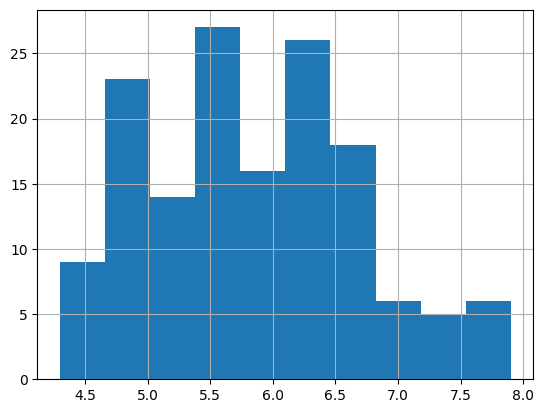

In [6]:
df['SepalLength'].hist()

<AxesSubplot:>

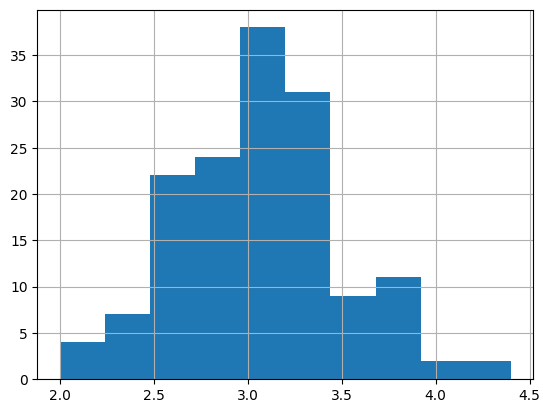

In [7]:
df['SepalWidth'].hist()

<AxesSubplot:>

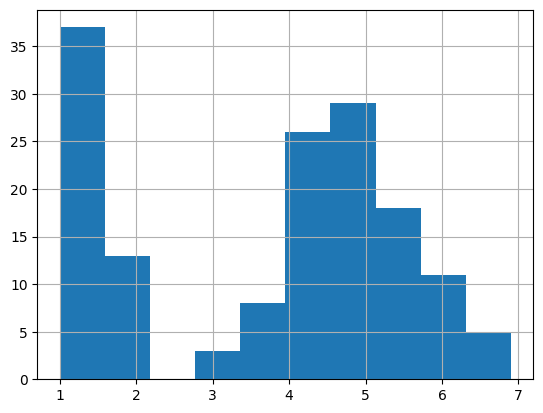

In [8]:
df['PetalLength'].hist()

<AxesSubplot:>

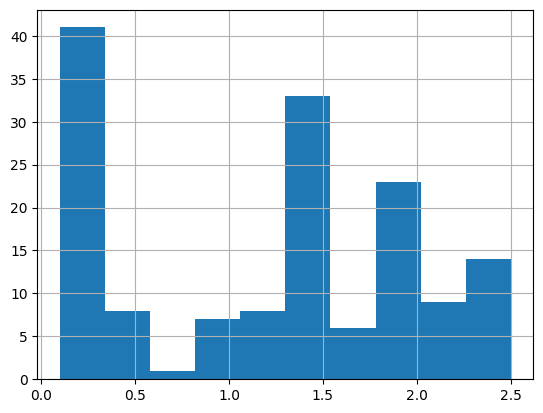

In [9]:
df['PetalWidth'].hist()

In [10]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

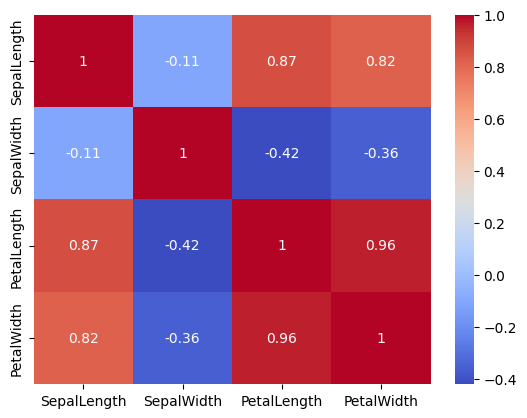

In [11]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap='coolwarm')

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df.drop(columns='Class')
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [17]:
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
print("Accuracy: ", model2.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNN 

knn = KNN(n_neighbors=3) 
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [32]:
knn.score(x_test,y_test) * 100

100.0

In [33]:
arr = knn.predict([[7.6,3,6.6,2.0],
                     [6.7,3.1,4.4,1.4]])
for i in arr:
    if i == 0:
        print('Iris Setosa')
    elif i == 1:
        print('Iris Versicolour')
    else:
        print('Iris Virginica')

Iris Virginica
Iris Versicolour


C:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [35]:
 
from joblib import Parallel, delayed 
import joblib 
  
  
# Save the model as a pickle in a file 
joblib.dump(knn, 'filename.pkl')

['filename.pkl']

In [38]:
le.inverse_transform([0, 1, 2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)